## Ad Sales Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
data = pd.read_csv(r"D:\IITR\ML Project\Oasis Infobyte\Ad Sales Prediction\Advertising.csv")

In [3]:
# having a breif overview of the data
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
# datatypes of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# dropping extra information in our data
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [8]:
# data statistics
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
# Checking for duplicate data
print(data.duplicated().sum())

0


In [11]:
# Checking for Missing Values
print('Missing Values:')
data.isnull().sum()

Missing Values:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization

In [12]:
# importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Figure size 500x300 with 0 Axes>

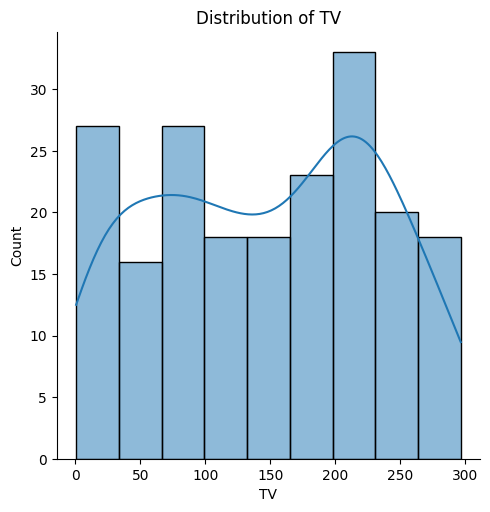

<Figure size 500x300 with 0 Axes>

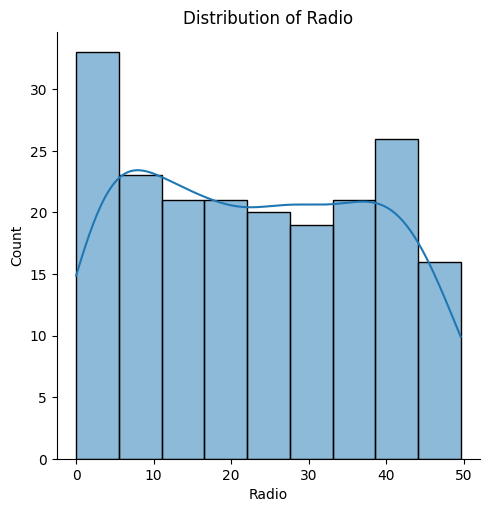

<Figure size 500x300 with 0 Axes>

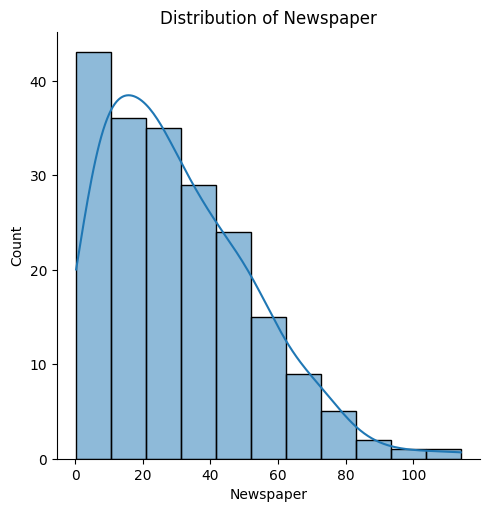

<Figure size 500x300 with 0 Axes>

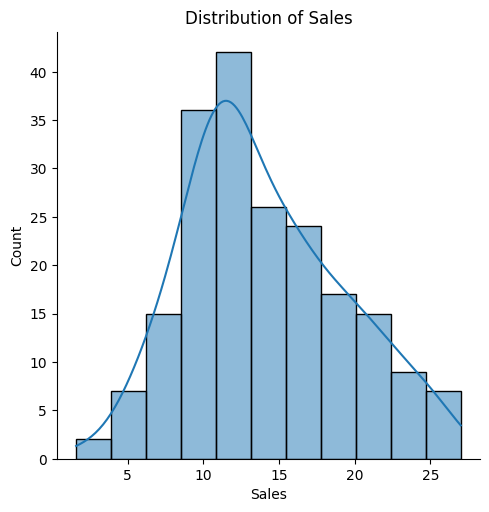

In [14]:
# Distribution of values of columns having numerical data
numerical_features = ['TV', 'Radio', 'Newspaper', 'Sales']

for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.displot(data= data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Handling Outliers

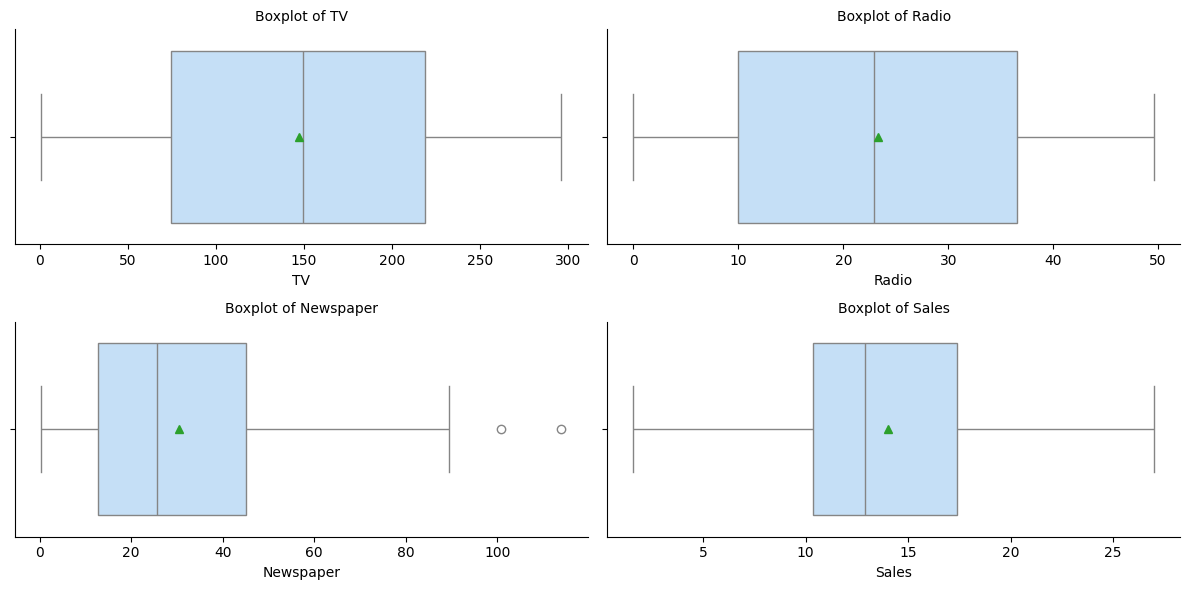

In [15]:
numerical_features = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, start=1):
    ax = plt.subplot(2, 2, i)  

    sns.boxplot(
        data=data,
        x=feature,  
        showmeans=True,  # Display mean as a marker within the box
        ax=ax,
        color='#BDE0FE'
    )

    plt.title(f'Boxplot of {feature}', fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Tight layout to prevent overlapping elements
plt.tight_layout()

plt.show()

## Train Test Splitting

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 160
Rows in test set: 40



In [17]:
train_set.shape

(160, 4)

In [18]:
test_set.shape

(40, 4)

## Looking for Correlations

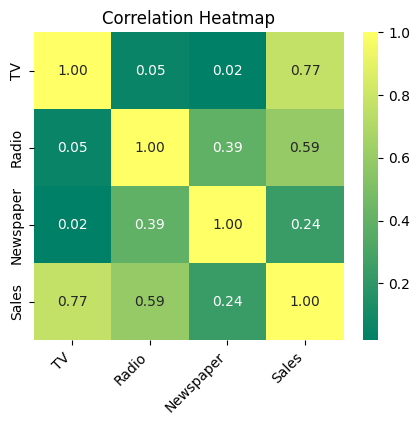

In [19]:
corr_matrix = train_set.corr()

# Creating a heatmap to visualize correlation
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.show()

In [20]:
# correlation with respect to target_column
corr_matrix['Sales'].sort_values(ascending = False)

Sales        1.000000
TV           0.768874
Radio        0.592373
Newspaper    0.237874
Name: Sales, dtype: float64

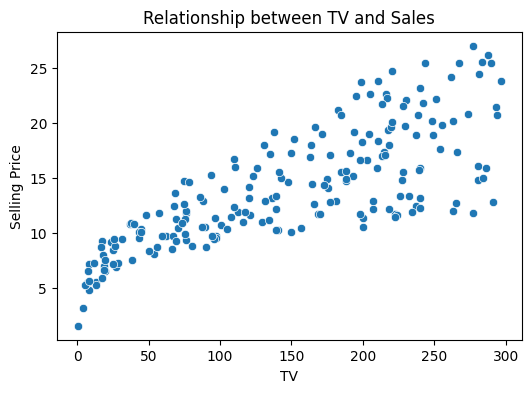

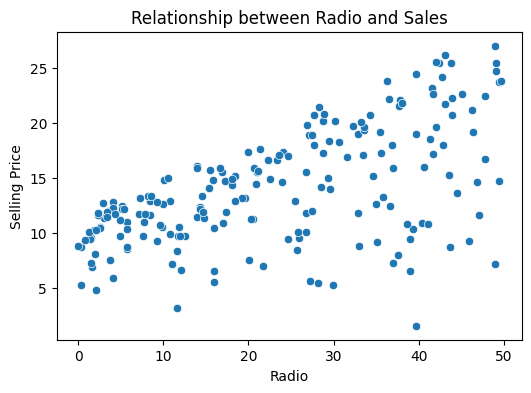

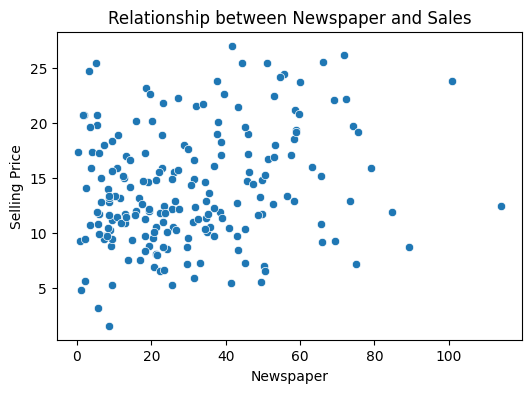

In [21]:
numerical_features = ['TV', 'Radio', 'Newspaper']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x= f'{feature}' , y='Sales', data=data)
    plt.title(f'Relationship between {feature} and Sales')
    plt.xlabel(f'{feature}')
    plt.ylabel('Selling Price')
    
    plt.show()

In [22]:
# Separating features (X_train) and target variable (Y_train) from the training set
X_train = train_set.drop('Sales', axis=1)  # Features
Y_train = train_set['Sales'].copy()  # Target variable

In [23]:
# Separating features (X_test) and target variable (Y_test) from the testing set
X_test = test_set.drop('Sales', axis=1)  # Features
Y_test = test_set['Sales'].copy()  # Target variable

## Scaling the Data

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std scaler', StandardScaler())
])

In [25]:
# Passing training dataset into our pipeline to do scaling
X_tr = my_pipeline.fit_transform(X_train)

In [26]:
X_tr.shape

(160, 3)

In [27]:
Y_train.shape

(160,)

In [28]:
# Passing testing dataset into our pipeline
X_ts = my_pipeline.fit_transform(X_test)

In [29]:
X_ts.shape

(40, 3)

In [30]:
Y_test.shape

(40,)

## Selecting a desired model and Evaluating it

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [32]:
# Using multiple models to find which gives best results
models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machines":SVR(),
    "Lasso Regression":Lasso(alpha=0.2),
    "Ridge Regression":Ridge(alpha=1.5)
}
for i in range(len(list(models))):
    model = list(models.values())[i]

     # Training our model
    model.fit(X_tr, Y_train)

    # Making predictions
    Y_train_pred = model.predict(X_tr)

    # Training set performance
    mse = mean_squared_error(Y_train, Y_train_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- RMSE: 1.6447


Random Forest
Model performance for Training set
- RMSE: 0.3080


Support Vector Machines
Model performance for Training set
- RMSE: 1.5210


Lasso Regression
Model performance for Training set
- RMSE: 1.6684


Ridge Regression
Model performance for Training set
- RMSE: 1.6453




## Using better evaluation technique - Cross Validation

In [33]:
# for better evaluation techniques we went for Cross_validation on training dataset having 10 folds
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
  # Perform cross-validation and calculate RMSE scores
  scores = cross_val_score(model, X_tr, Y_train, scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)

  # Printing model name and average RMSE
  print(f"Model: {model_name}")
  print(f"Average RMSE: {rmse_scores.mean()}")
  print("-" * 30) 

Model: Linear Regression
Average RMSE: 1.6513523730313335
------------------------------
Model: Random Forest
Average RMSE: 0.8195627706791205
------------------------------
Model: Support Vector Machines
Average RMSE: 1.7266791836245516
------------------------------
Model: Lasso Regression
Average RMSE: 1.6670423084515562
------------------------------
Model: Ridge Regression
Average RMSE: 1.6526986215926236
------------------------------


## Testing the model on test data

In [34]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    Y_test_pred = model.predict(X_ts)

    # Testing set performance
    mse = mean_squared_error(Y_test, Y_test_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Testing set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Testing set
- RMSE: 1.8942


Random Forest
Model performance for Testing set
- RMSE: 1.3323


Support Vector Machines
Model performance for Testing set
- RMSE: 1.6968


Lasso Regression
Model performance for Testing set
- RMSE: 1.9644


Ridge Regression
Model performance for Testing set
- RMSE: 1.9064


